### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [36]:
# Loading the necessary libraries
%load_ext tensorboard
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization,Flatten
import matplotlib.pyplot as plt
from keras.optimizers import SGD
import pandas as pd


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [37]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

In [39]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()
print('The training features data shape is',trainX.shape)

The training features data shape is (60000, 28, 28)


In [40]:
print('The testing features data shape is',testX.shape)
print(trainY[0:10])

The testing features data shape is (10000, 28, 28)
[9 0 0 3 0 2 7 2 5 5]


In [41]:
print(testY[0:10])

[9 2 1 1 6 1 4 6 5 7]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:

trainYn = tf.keras.utils.to_categorical(trainY)

In [0]:
testYn = tf.keras.utils.to_categorical(testY)

In [44]:
print(trainYn.shape)
print('First 5 examples now are: ', trainYn[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [45]:
print(testYn.shape)

(10000, 10)


In [46]:
print(trainYn.shape)

(60000, 10)


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
#creating labels

classname = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [48]:
#visualizing single image
trainYn[0].shape


(10,)

In [49]:
trainX[0].shape

(28, 28)

In [0]:

import numpy as np
import datetime
#img = np.reshape(trainX[0], (-1, 28, 28, 1))

In [0]:
# Clear out any prior log data.
#!rm -rf logs

# Sets up a timestamped log directory.
#logdir = "logs/traindata/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Creates a file writer for the log directory.
#file_writer = tf.summary.create_file_writer(logdir)

# Using the file writer, log the reshaped image.
#with file_writer.as_default():
 # tf.summary.image("Training data", img, step=0)

In [0]:
#%tensorboard --logdir logs/traindata

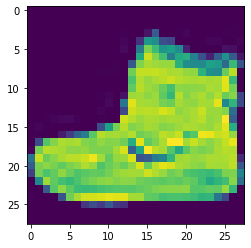

In [53]:
#viewing single image
plt.figure()
plt.imshow(trainX[0])
plt.grid(False)
plt.show()

In [0]:
#scaling the data between 0 to 1
trainX = trainX/255.0
testX = testX/255.0

In [0]:
#plotting first image in training set with their images

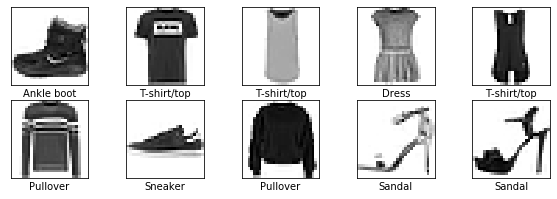

Label for each of the above image is [9 0 0 3 0 2 7 2 5 5]


In [56]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(classname[trainY[i]])
plt.show()
print('Label for each of the above image is',trainY[0:10])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
       keras.layers.Dense(10, activation=tf.nn.softmax)])
# Add Dense layer for prediction - Keras declares weights and bias automatically
#model.add(tf.keras.layers.Dense(10))
model.compile(optimizer='sgd',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

### Execute the model using model.fit()

In [71]:
model.fit(trainX,trainYn,validation_data=(testX, testYn),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.4166 - acc: 0.8536 - val_loss: 0.4517 - val_acc: 0.8437
Epoch 2/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.4144 - acc: 0.8552 - val_loss: 0.4539 - val_acc: 0.8434
Epoch 3/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.4116 - acc: 0.8556 - val_loss: 0.4558 - val_acc: 0.8432
Epoch 4/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.4147 - acc: 0.8532 - val_loss: 0.4582 - val_acc: 0.8392
Epoch 5/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.4118 - acc: 0.8559 - val_loss: 0.4582 - val_acc: 0.8395
Epoch 6/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.4115 - acc: 0.8562 - val_loss: 0.4580 - val_acc: 0.8405
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.4126 - acc: 0.8569 - val_loss: 0.4628 - 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model = Sequential()
   
    
# Adding Batcj normalization layer after the input layer

model.add(Flatten(input_shape=(28, 28)))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))


### Execute the model

In [60]:
#executing the model
opt = SGD()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=["accuracy"])
model.fit(trainX,trainYn,validation_data=(testX, testYn),epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.6000 - acc: 0.7929 - val_loss: 0.5135 - val_acc: 0.8215
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.4918 - acc: 0.8296 - val_loss: 0.4831 - val_acc: 0.8323
Epoch 3/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.4693 - acc: 0.8387 - val_loss: 0.4781 - val_acc: 0.8341
Epoch 4/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.4564 - acc: 0.8414 - val_loss: 0.4655 - val_acc: 0.8372
Epoch 5/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.4491 - acc: 0.8457 - val_loss: 0.4709 - val_acc: 0.8349
Epoch 6/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.4435 - acc: 0.8452 - val_loss: 0.4612 - val_acc: 0.8393
Epoch 7/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.4387 - acc: 0.8464 - val_loss: 0.4573 -

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#customizing the learning rate to 0.001 in sgd optimizer
modelnew = Sequential()
   
    
# Add Dense layer for prediction - Keras declares weights and bias automatically

modelnew.add(Flatten(input_shape=(28, 28)))
modelnew.add(BatchNormalization())
modelnew.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.001)
modelnew.compile(optimizer=opt,loss='categorical_crossentropy',metrics=["accuracy"])


In [90]:
modelnew.fit(trainX,trainYn,validation_data=(testX, testYn),epochs=20,batch_size=30)
#The testing accuracy of the model is 83%

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.4876 - acc: 0.8328 - val_loss: 0.4968 - val_acc: 0.8304
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.4845 - acc: 0.8333 - val_loss: 0.4932 - val_acc: 0.8299
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.4805 - acc: 0.8348 - val_loss: 0.4913 - val_acc: 0.8310
Epoch 4/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.4774 - acc: 0.8343 - val_loss: 0.4875 - val_acc: 0.8319
Epoch 5/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.4726 - acc: 0.8368 - val_loss: 0.4857 - val_acc: 0.8329
Epoch 6/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.4693 - acc: 0.8393 - val_loss: 0.4836 - val_acc: 0.8328
Epoch 7/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.4676 - acc: 0.8387 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#building 3 dense layers with 100,100,10 neurons in each layer,using sigmoid activation function in the hidden layers and softmax in the output layer with learning rate 0.03

In [0]:
model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(BatchNormalization(input_shape=(28,)))
model3.add(Dense(100, activation='sigmoid'))
model3.add(Dense(100, activation='sigmoid'))
model3.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.03)

In [0]:
model3.compile(optimizer=opt,loss='categorical_crossentropy',metrics=["accuracy"])

In [73]:
output = model3.fit(trainX,trainYn,validation_data=(testX, testYn),epochs=20,batch_size=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.3591 - acc: 0.8713 - val_loss: 0.3745 - val_acc: 0.8645
Epoch 2/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.3504 - acc: 0.8736 - val_loss: 0.3693 - val_acc: 0.8667
Epoch 3/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.3430 - acc: 0.8773 - val_loss: 0.3641 - val_acc: 0.8682
Epoch 4/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.3350 - acc: 0.8787 - val_loss: 0.3611 - val_acc: 0.8692
Epoch 5/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.3293 - acc: 0.8811 - val_loss: 0.3557 - val_acc: 0.8720
Epoch 6/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.3220 - acc: 0.8838 - val_loss: 0.3551 - val_acc: 0.8707
Epoch 7/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.3163 - acc: 0.8851 - val_loss: 0.

In [0]:
#model accuracy increased to 88% with the 3 dense layers and with learnig rate 0.03

## Review model

In [74]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

Train: 0.925, Test: 0.881


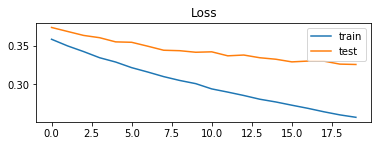

In [89]:
# evaluate the model
from matplotlib import pyplot
_, trainloss = model3.evaluate(trainX, trainYn, verbose=0)
_, testloss = model3.evaluate(testX, testYn, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output.history['loss'], label='train')
pyplot.plot(output.history['val_loss'], label='test')
pyplot.legend()


In [77]:
probs = model.predict(testX)
print(probs.argmax(axis=1))

[9 2 1 ... 8 1 5]


In [0]:
import math
class_names = {i:cn for i, cn in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }
def plot(images, labels, predictions=None):
    """Helper function to plot images, labels and predictions
    Parameters
    ----------
    images : 3D matrix of image
    labels : 1D array
    predictions (optional): 1D array
    """
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols+3, n_rows+4))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(f"lbl: {class_names[y_true]}")
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
        
        ax.set_xticks([])
        ax.set_yticks([])

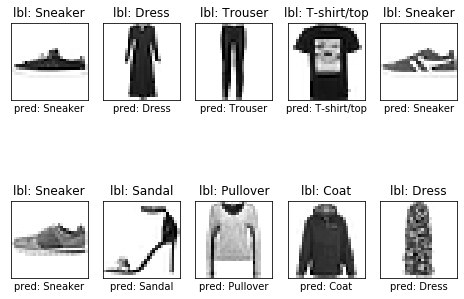

In [88]:
#predicting the model classes
preds = model.predict_classes(testX)

# plot 20 random data
rand_idxs = np.random.permutation(len(testX))[:10]

plot(testX[rand_idxs], testY[rand_idxs], preds[rand_idxs])